In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# load dataset into dataframe
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# check shape of dataframe
df.shape

(19735, 29)

In [4]:
# check data description
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
# count null values in dataframe
df.isnull().sum().sum()

0

In [6]:
# drop irrelevant columns
df.drop(columns=['date', 'lights'], inplace=True)

In [7]:
# normalize the data
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns )

In [8]:
# preview normalized data
norm_df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [9]:
# set split parameters
test_size = 0.3 # 30% test set
random_state = 42

## Q 12

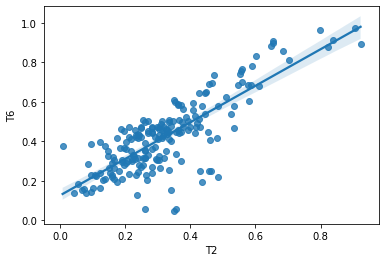

In [10]:
#select a sample of the dataset
df = norm_df[['T2', 'T6']].sample(frac = 0.01)

#regression plot
sns.regplot(x="T2", y="T6", data=df)

In [11]:
features = norm_df[['T2']]
target = norm_df['T6']

lr = LinearRegression()
# splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=random_state)

lr.fit(x_train,y_train)
predicted = lr.predict(x_test)

r2_score__ = r2_score(y_test, predicted)
print('R2 score of T2 against T6 is : ', round(r2_score__, 2))

R2 score of T2 against T6 is :  0.64


In [12]:
# set features and targets
features = norm_df.drop(['Appliances'], axis= 1)
target = norm_df['Appliances']

In [13]:
# split data into train and test sets 
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state= random_state)

In [14]:
# check length of train and test sets
len(x_train), len(y_train), len(x_test), len(y_test)

(13814, 13814, 5921, 5921)

## LInear regression

In [15]:
# define linear regressor
linear_reg = LinearRegression()

# fit regressor on data
linear_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# make test predictions with linear regression  model 
lr_prediction = linear_reg.predict(x_test)

In [17]:
# get intercept of the linear regression  model 
linear_reg_intercept= linear_reg.intercept_
print('Coefficient: ', round(linear_reg_intercept, 2))

Coefficient:  0.15


In [19]:
# get mean  absolute error of the linear regression  model 
linear_mae = mean_absolute_error(y_test, lr_prediction)
print('Linear MAE :', round(linear_mae, 3))

Linear MAE : 0.05


In [20]:
# get the r2 of the linear regression  model 
linear_r2_score_ = r2_score(y_test, lr_prediction)
print('Linear R2 score :', round(linear_r2_score_, 2))

Linear R2 score : 0.15


In [21]:
# get the root mean  square error of the linear regression  model 
linear_rmse = np.sqrt(mean_squared_error(y_test, lr_prediction))
print('RMSE :', round(linear_rmse, 3))

RMSE : 0.088


In [23]:
# get the residual sum of squares of the linear regression  model
linear_rss = np.sum(np.square(y_test - lr_prediction))
print('Linear RSS :', round(linear_rss, 2))

Linear RSS : 45.35


## Ridge Regression

In [24]:
# Define and train rdge  a ridge regressor
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train,y_train)

# make test predictions with ridge regression model
ridge_prediction = ridge_reg.predict(x_test)

# get the root mean  square error of the ridge regression  model
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_prediction))
print('RMSE for Ridge :', round(ridge_rmse, 3))

RMSE for Ridge : 0.088


In [25]:
linear_rmse == ridge_rmse

False

## Lasso Regression

In [26]:
# Define and train a lasso regressor 
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train,y_train)

# make test predictions with lasso regression model
lasso_prediction = lasso_reg.predict(x_test)

# get the root mean  square error of the lasso regression  model 
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_prediction))
print('RMSE for Lasso :', round(lasso_rmse, 3))

RMSE for Lasso : 0.094


## combine weights

In [27]:
# get weights of each a model into data frame
def get_weight_df(model, features, col_name):
    """
    get weights of each a model into data framem 
    model: a trained regression  model 
    features: features of the model
    col_name: column name for the weights in the dataframe
    """
    weights = pd.Series(model.coef_, features).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [28]:
# get weights of models into respective dataframes
linear_weights = get_weight_df(linear_reg, x_train.columns, 'Linear_Weight')
ridge_weights = get_weight_df(ridge_reg, x_train.columns, 'Ridge_Weight')
lasso_weights = get_weight_df(lasso_reg, x_train.columns, 'Lasso_Weight')

In [29]:
# combine weights dataframes 
combined_weights = pd.concat([linear_weights, ridge_weights['Ridge_Weight'], lasso_weights['Lasso_Weight']], axis=1)
combined = combined_weights.set_index('Features')
combined

,Linear_Weight,Ridge_Weight,Lasso_Weight
Features,,,
RH_2,-0.456698,-0.411071,-0.049557
T_out,-0.321860,-0.262172,-0.000110
T2,-0.236178,-0.201397,0.000000
T9,-0.189941,-0.188916,0.000000
RH_8,-0.157595,-0.156830,0.000000
RH_out,-0.077671,-0.054724,-0.000000
RH_7,-0.044614,-0.045977,0.000000
RH_9,-0.039800,-0.041367,-0.000000
T5,-0.015657,-0.019853,-0.000000


In [30]:
# get feature with minimum linear regression weight
combined[combined['Linear_Weight']==combined['Linear_Weight'].min()]

,Linear_Weight,Ridge_Weight,Lasso_Weight
Features,,,
RH_2,-0.456698,-0.411071,-0.049557


In [31]:
# get feature with maximum  linear regression weight
combined[combined['Linear_Weight']==combined['Linear_Weight'].max()]

,Linear_Weight,Ridge_Weight,Lasso_Weight
Features,,,
RH_1,0.553547,0.519525,0.01788


In [32]:
# get Lasso weights that isn't zero
not_zero = combined[combined['Lasso_Weight']!=0]
not_zero

,Linear_Weight,Ridge_Weight,Lasso_Weight
Features,,,
RH_2,-0.456698,-0.411071,-0.049557
T_out,-0.321860,-0.262172,-0.000110
T3,0.290627,0.288087,0.002912
RH_1,0.553547,0.519525,0.017880


In [33]:
# get count of Lasso weight that isn't zero
len(not_zero)

4